El dataset consiste en los datos de todos los turnos del 2017 de la sede de un hospital de la zona de Belgrano/Nueñez

In [5]:
# importamos bibliotecas que vamos a utilizar
% matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import seaborn as sns

# CARGAMOS DATOS Y VEMOS INFO
df = pd.read_csv('turnos.csv')  # DATOS DE TURNOS 2017

print(df.columns, df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244388 entries, 0 to 244387
Data columns (total 20 columns):
TipoRecursoAgendable_ID    244388 non-null int64
RecursoAgendable_ID        244388 non-null int64
Fecha                      244388 non-null object
HoraDesde                  244388 non-null object
HoraHasta                  244388 non-null object
DurTurno                   244388 non-null int64
DiaSemana                  244388 non-null int64
NroMes                     244388 non-null int64
TurnoOtorgado_ID           244388 non-null int64
Paciente_ID                244388 non-null int64
Sobreturno                 244388 non-null int64
ItemAgendable_ID           244388 non-null int64
Especialidad               244388 non-null object
Entidad_ID                 244388 non-null int64
delta_dias                 244388 non-null int64
Sexo                       244388 non-null object
edad                       244388 non-null int64
Asistio                    244388 non-null int64
Pr

TipoRecursoAgendable_ID  RecursoAgendable_ID       Fecha HoraDesde  \
0                        1                 1512  2017-12-11     16:00   
1                        2                  126  2017-10-28     12:30   
2                        2                  130  2017-04-13     11:00   
3                        2                  126  2017-09-16     17:00   
4                        1                  369  2017-06-09     08:30   

  HoraHasta  DurTurno  DiaSemana  NroMes  TurnoOtorgado_ID  Paciente_ID  \
0     16:30        30          2      12           7177207            3   
1     13:20        50          7      10           7125309           11   
2     11:30        30          5       4           6689079           11   
3     17:30        30          7       9           7038442           74   
4     09:00        30          6       6           6856172           94   

   Sobreturno  ItemAgendable_ID          Especialidad  Entidad_ID  delta_dias  \
0           0            420101    NEUROLOGIA ADULTOS         151          27   
1           0         112345001  RESONANCIA MAGNETICA           2          15   
2           0            291044         NEUROOTOLOGIA           2          55   
3           0         100345023  RESONANCIA MAGNETICA           0          16   
4           0            420101    NEUROLOGIA ADULTOS         151          18   

  Sexo  edad  Asistio        Provincia        Localidad  
0    F    96        0  Capital Federal  Capital Federal  
1    M    70        1  Capital Federal  Capital Federal  
2    M    70        0  Capital Federal  Capital Federal  
3    F    61        1  Capital Federal  Capital Federal  
4    F    85        1     Buenos Aires  Capital Federal

In [6]:
df[['DurTurno', 'delta_dias', 'edad']].describe()

DurTurno     delta_dias           edad
count  244388.000000  244388.000000  244388.000000
mean       27.624491      29.985007      49.161906
std        17.783470      33.125100      24.050854
min         5.000000     -36.000000       0.000000
25%        20.000000       7.000000      31.000000
50%        30.000000      20.000000      52.000000
75%        30.000000      42.000000      70.000000
max       120.000000     516.000000     100.000000

In [7]:
# GENERAMOS FEATURES NUEVOS COMO:
#CANTIDAD DE ASISTENCIAS POR PACIENTE
df['cant_asistencias'] = df.groupby('Paciente_ID')[['Asistio']].transform(sum)
# CANTIDAD DE TURNOS POR PACIENTE
df['cant_turnos'] = df.groupby('Paciente_ID')[['Asistio']].transform('count')
# PROMEDIO DE ASISTENCIAS
df['prom_asistencia'] = df.cant_asistencias / df.cant_turnos

In [8]:
df2 = df.copy()
# Quitamos las columnas 'Localidad', 'HoraDesde', 'HoraHasta', y 'TurnoOtorgado_ID' 
# [[ 22505   7675]
# [ 29342 124433]]
#df = df.drop(columns=['HoraDesde', 'HoraHasta', 'ItemAgendable_ID', 'TurnoOtorgado_ID','Entidad_ID' , 'Fecha', 'Paciente_ID','Especialidad' , 'Provincia', 'TipoRecursoAgendable_ID', 'RecursoAgendable_ID'])
df = df.drop(columns=['HoraHasta', 'ItemAgendable_ID', 'TurnoOtorgado_ID', 'Fecha', 'Paciente_ID', 'Provincia', 'TipoRecursoAgendable_ID', 'RecursoAgendable_ID', 'Entidad_ID', 'DurTurno', 'Sobreturno', 'Localidad', 'Especialidad', 'HoraDesde', 'cant_asistencias', 'cant_turnos'])

In [9]:
# Obtenemos dummies
df = pd.get_dummies(df)

In [10]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,precision_recall_curve,recall_score,precision_score,auc,roc_curve
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [11]:
# Definimos X, y
X = df.drop(columns='Asistio') 
y = df['Asistio']

In [12]:
# Hacemos el split entre train y test
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(X), y, test_size=0.33, random_state=42)
#sm = SMOTE(random_state=12)
#X_train_res, y_train_res = sm.fit_sample(X_train, X_test)

## Regresión Lógistica

In [13]:
# Entrenamos Regresión Logística (sacar variables no cuantitativas)
clf = LogisticRegression(C=1e10, class_weight='balanced')
clf.fit(X_train, y_train)
#clf.fit(X_train_res, y_train_res)

LogisticRegression(C=10000000000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [14]:
y_pred = clf.predict(X_test)

In [15]:
# Calculamos Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy=', accuracy_score(y_test, y_pred))

Accuracy= 0.8273134198812137


In [16]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[10430  2879]
 [11048 56292]]


In [17]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confusion, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        ax.text(x=j, y=i, s=confusion[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

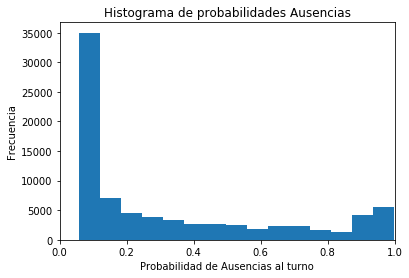

In [18]:
lr_log_predicts = clf.predict_proba(X_test)

preds_left = lr_log_predicts[:,0]
# 15 bins
plt.hist(preds_left, bins=15)
plt.xlim(0,1)
plt.title('Histograma de probabilidades Ausencias')
plt.xlabel('Probabilidad de Ausencias al turno')
plt.ylabel('Frecuencia')
plt.show()

In [19]:
# Contamos los valores reales de y con value_counts y coincide con lo anterior
y_test.value_counts()

1    67340
0    13309
Name: Asistio, dtype: int64

In [20]:
print('Amount of correct positives classified: ',recall_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))
print (classification_report(y_test,y_pred))

Amount of correct positives classified:  0.8359370359370359
Precision:  0.9513444085785266
F1 Score:  0.8899147109737492
             precision    recall  f1-score   support

          0       0.49      0.78      0.60     13309
          1       0.95      0.84      0.89     67340

avg / total       0.87      0.83      0.84     80649



In [21]:
fpr,tpr,ths = roc_curve(y_test, lr_log_predicts[:,1])
curve = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(curve['fpr'],curve['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

In [ ]:
X.head(5)

DiaSemana  NroMes  delta_dias  edad  prom_asistencia  Sexo_F  Sexo_M
0          2      12          27    96         0.000000       1       0
1          7      10          15    70         0.500000       0       1
2          5       4          55    70         0.500000       0       1
3          7       9          16    61         1.000000       1       0
4          6       6          18    85         0.666667       1       0

In [32]:
#clf.predict([(5, 1, 1, 6, 0.666667, 0, 1)])

array([0])

## Prediccion de asistencia

In [35]:
def predict_asistencia(DiasSemana, NroMes, delta_idas, edad, prom_asistencia, Sexo_F, Sexo_M):    
    predict = clf.predict([(DiasSemana, NroMes, delta_idas, edad, prom_asistencia, Sexo_F, Sexo_M)])
    return predict[0]


def predict_proba(DiasSemana, NroMes, delta_idas, edad, prom_asistencia, Sexo_F, Sexo_M, prediccion):    
    proba = clf.predict_proba([(DiasSemana, NroMes, delta_idas, edad, prom_asistencia, Sexo_F, Sexo_M)])
    return proba[0][prediccion]

## Expose via REST API endpoints

In [ ]:
import json

In [ ]:
# POST /predict_asistencia

req = json.loads(REQUEST)
# pull out the body
body = req['body']

diasSemana = body.get('DiasSemana')
nroMes = body.get('NroMes')
delta_idas = body.get('delta_idas')
edad = body.get('edad')
prom_asistencia = body.get('prom_asistencia')
if body.get('Sexo') == 'M': ## Maculino
    sexo_M = 1
    sexo_F = 0
else:
    sexo_M = 0
    sexo_F = 1


predict = predict_asistencia(diasSemana, nroMes, delta_idas, edad, prom_asistencia, sexo_F, sexo_M)
proba = predict_proba(diasSemana, nroMes, delta_idas, edad, prom_asistencia, sexo_F, sexo_M, predict)
result = {"prediccion_asistencia": int(predict), "score": float(proba)}

status = 200
print(json.dumps(result))

In [ ]:
# ResponseInfo POST /predict_asistencia
print(json.dumps({
    "status" : status,
    "headers" : {
        "Content-Type" : "application/json"
    }
}))